📊 R² Score: -0.003
📉 Mean Squared Error: 726780.71


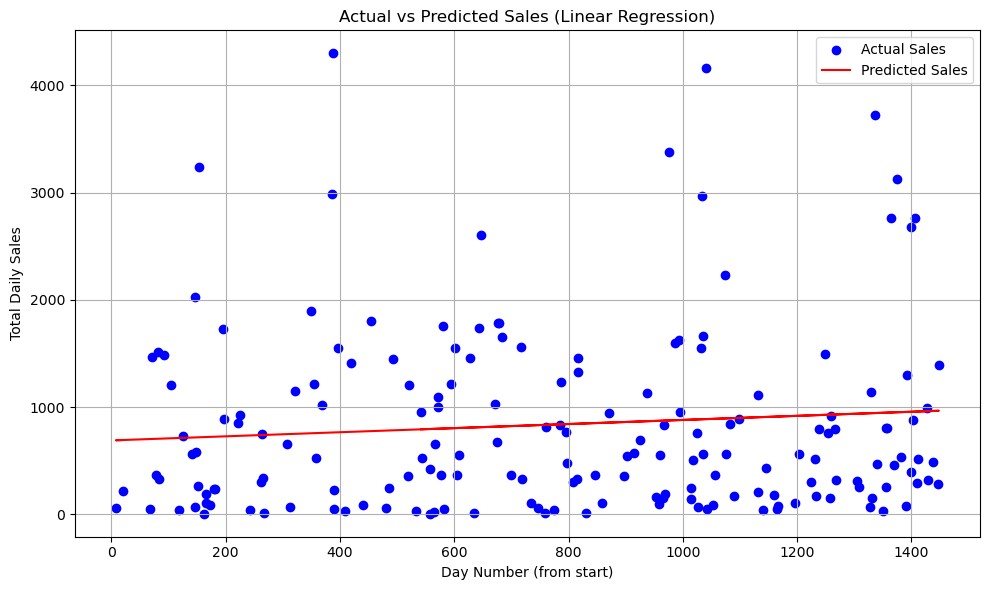

<Figure size 640x480 with 0 Axes>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Loading dataset
df = pd.read_csv('stores_sales_forecasting.csv', encoding='ISO-8859-1')

# Step 1: Preprocess the data
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df = df.dropna(subset=['Order Date', 'Sales'])  # Remove rows with missing dates or sales
df = df.sort_values('Order Date')

# Step 2: Aggregate daily sales
daily_sales = df.groupby('Order Date').agg({'Sales': 'sum'}).reset_index()

# Step 3: Feature engineering
daily_sales['day_number'] = (daily_sales['Order Date'] - daily_sales['Order Date'].min()).dt.days

X = daily_sales[['day_number']]  # Feature: day index
y = daily_sales['Sales']         # Target: total sales

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 5: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("📊 R² Score:", round(r2, 3))
print("📉 Mean Squared Error:", round(mse, 2))

# Step 7: Visualization
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.plot(X_test, y_pred, color='red', label='Predicted Sales')
plt.xlabel('Day Number (from start)')
plt.ylabel('Total Daily Sales')
plt.title('Actual vs Predicted Sales (Linear Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Save the figure to a PNG file
plt.savefig("sales_forecasting_plot.png")

